In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hide warnings
import warnings

warnings.filterwarnings("ignore")

# 1. Read and concatenate raw data

In [3]:
# Read the data from the CSV file
data1 = pd.read_csv("../Data/socialinsider_events_2024-05.csv")
data2 = pd.read_csv("../Data/socialinsider_events_2024-06.csv")
data3 = pd.read_csv("../Data/socialinsider_events_2024-07.csv")
data4 = pd.read_csv("../Data/socialinsider_events_2024-08.csv")
data5 = pd.read_csv("../Data/socialinsider_events_2024-09.csv")

# Concatenate the data
data = pd.concat([data1, data2, data3, data4, data5])

# Sort the data by time_created
data = data.sort_values(by="time_created")

In [4]:
# Filter data to not include India
data = data[data["country"] != "India"]

In [5]:
data.head()

,event_name,user_id,time_created,user_type,time_zone,country,view,platform,report_type,load_time
237525,profile load success,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T20:59:17.702Z,trial,Europe/London,Britain (UK),profile,ig,NaN,1.264
237524,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.728Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN
237523,compare,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.765Z,trial,Europe/London,Britain (UK),profile,instagram,NaN,NaN
237522,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:20.243Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN
237521,profile visit,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:27.275Z,trial,Europe/London,Britain (UK),profile,tw,NaN,NaN


# 2. Data Preprocessing

In [6]:
# Create a column that show whether the event is successful or not
buy_users = data[
    (data["event_name"] == "New Client") | (data["event_name"] == "Buy Success")
]["user_id"].tolist()
# 1 if the user is in buy_users, 0 otherwise
data["successful"] = data["user_id"].apply(lambda x: 1 if x in buy_users else 0)

# create the date that the event was created
data["Date_Created"] = pd.to_datetime(data["time_created"]).dt.date
# create the hour that the event was created
data["Hour_Created"] = pd.to_datetime(data["time_created"]).dt.hour
# create the day of the week that the event was created
data["Day_Of_Week_Created"] = pd.to_datetime(data["time_created"]).dt.day_name()

# 3. Missing Value

In [7]:
data.isnull().sum()

event_name               6326
user_id                     0
time_created                0
user_type                   0
time_zone               61506
country                107849
view                   294741
platform                61504
report_type            815379
load_time              710261
successful                  0
Date_Created                0
Hour_Created                0
Day_Of_Week_Created         0
dtype: int64

In [8]:
# calucate the percentage of missing values
data.isnull().sum() / len(data) * 100

event_name              0.762341
user_id                 0.000000
time_created            0.000000
user_type               0.000000
time_zone               7.412040
country                12.996799
view                   35.519009
platform                7.411799
report_type            98.260690
load_time              85.593002
successful              0.000000
Date_Created            0.000000
Hour_Created            0.000000
Day_Of_Week_Created     0.000000
dtype: float64

# 4. Data Overview

#### Country

In [9]:
data["country"].value_counts()

country
Indonesia        84093
United States    75962
Egypt            52495
Britain (UK)     43806
Thailand         37579
                 ...  
Liberia              8
Bahamas              5
Fiji                 2
Angola               2
Togo                 1
Name: count, Length: 142, dtype: int64

#### Timezone

In [10]:
data["time_zone"].value_counts()

time_zone
Asia/Jakarta        82132
Africa/Cairo        52495
Europe/London       43806
Asia/Bangkok        37579
America/New_York    34933
                    ...  
America/Nassau          5
Pacific/Fiji            2
Africa/Luanda           2
America/Regina          1
Africa/Lome             1
Name: count, Length: 217, dtype: int64

### View

In [11]:
data["view"].value_counts()

view
profile        315796
benchmark       78389
projecthome     58169
postsfeed       24168
brands          21908
campaigns       18658
reports          5975
upgradeplan      5316
hashtag          4146
settings         1693
bench             263
add               255
proj              122
ads                97
addprofiles        67
search             31
connect            17
page                1
Name: count, dtype: int64

In [12]:
# count the data by view and event_name
view_data = data.groupby(["view", "event_name"]).size().unstack(fill_value=0)
view_data

event_name,upgrade_plan,add profile success,autoreports click,book a demo,brand click,brand load success,connect click,connect fb success,connect social accounts sidebar,connect success,...,edit autoreport click,reports_history_add_autoreports,reports_history_copy_link,reports_history_download,save autoreport changes click,save autoreport changes success,save autoreport click,schedule autoreport click,Invoices section click,Manage section click
view,,,,,,,,,,,,,,,,,,,,,
add,255,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
addprofiles,67,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ads,1,5,3,1,2,4,2,3,4,3,...,0,0,0,0,0,0,0,0,0,0
bench,9,0,0,0,0,0,3,0,6,1,...,0,0,0,0,0,0,0,0,0,0
benchmark,233,24,378,17,169,32,10,0,39,1,...,0,0,0,0,0,0,0,0,0,0
brands,96,1,62,10,1172,7648,3,0,25,0,...,0,0,0,0,0,0,0,0,0,0
campaigns,44,3,1368,7,53,9,1,0,10,0,...,0,0,0,0,0,0,0,0,0,0
connect,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hashtag,14,0,0,0,0,0,5,4,14,2,...,0,0,0,0,0,0,0,0,0,0


# 5. Create Buy Success and Not Buy Success Datasets

In [13]:
buy_users = data[
    (data["event_name"] == "New Client") | (data["event_name"] == "Buy Success")
]["user_id"].tolist()

# create a dataset with only the successful events
buy_users_events = data[data["user_id"].isin(buy_users)]
# create a dataset with only the unsuccessful events
not_buy_users_events = data[data["successful"] == 0]

# dictionary of both datasets
buy_not_buy = {
    "buy_users_events": buy_users_events,
    "not_buy_users_events": not_buy_users_events,
}

### View in buy success event

In [14]:
# calculate the percentage of views in both successful and not successful events
print(
    "buy success event",
    buy_users_events["view"].value_counts() / len(buy_users_events) * 100,
)
print(
    "not buy success event",
    not_buy_users_events["view"].value_counts() / len(not_buy_users_events) * 100,
)

buy success event view
profile        20.958850
benchmark      20.299272
projecthome    10.789525
brands          6.113408
postsfeed       2.234692
campaigns       1.348691
settings        0.935223
upgradeplan     0.905690
reports         0.708801
ads             0.167356
add             0.078756
addprofiles     0.059067
proj            0.019689
hashtag         0.009844
connect         0.009844
Name: count, dtype: float64
not buy success event view
profile        38.268220
benchmark       9.312100
projecthome     6.963060
postsfeed       2.920867
brands          2.597071
campaigns       2.259612
reports         0.720182
upgradeplan     0.637342
hashtag         0.505701
settings        0.194960
bench           0.032087
add             0.030135
proj            0.014640
ads             0.009760
addprofiles     0.007442
search          0.003782
connect         0.001952
page            0.000122
Name: count, dtype: float64


# 6. User Data Transformation

In [15]:
user_data = (
    data.groupby("user_id")
    .agg(
        {
            "event_name": "count",  # Count events
            "country": "first",  # Take the first occurrence of country (assuming it's the same for each user)
            "time_zone": "first",  # Take the first occurrence of time_zone (assuming it's the same for each user)
        }
    )
    .reset_index()
    .rename(columns={"event_name": "count"})  # Rename for clarity
    .sort_values(by="count", ascending=False)  # Sort by event_count
)

# Add the column to show whether the user is successful or not
user_data["successful"] = user_data["user_id"].apply(
    lambda x: 1 if x in buy_users else 0
)
user_data.head()

,user_id,count,country,time_zone,successful
8372,cd6d41c28b017733e39fc13e4d4ae3b308c6baff52561d...,6973,United States,America/New_York,0
3641,5929c3eec5a2b12ee4aa911b8093b33ac7b798d59e3b14...,4700,Indonesia,Asia/Jakarta,0
4005,622748abdc404cbf098568074c232b04762d574fa48130...,3925,Ukraine,Europe/Kiev,0
10281,fd15147418cba03da1908de36ac79bc24589c9d1474716...,3538,Thailand,Asia/Bangkok,0
3784,5c54eb7d3e4821d8e633e7ef23dacafe3f5a6530715510...,3387,Germany,Europe/Berlin,0


### 14-day Engagement Tracking (At Least 5 Events per Day)

In [17]:
# Step 0: Ensure the 'Date_Created' column is in datetime format
data["Date_Created"] = pd.to_datetime(data["Date_Created"])

# Step 1: Recreate the DataFrame to store day_0 to day_14 activity status for each user
unique_users = data["user_id"].unique()
days_active_cols = [f"Day_{i}_Active" for i in range(15)]
user_activity_df = pd.DataFrame(unique_users, columns=["user_id"])

# Initialize all day columns with 0
for col in days_active_cols:
    user_activity_df[col] = 0

# Step 2: Iterate through each user, and for each activity, mark the corresponding day as active (1)
for user in unique_users:
    # Get the signup date for the user based on the 'signup success' event
    signup_date = data[
        (data["user_id"] == user) & (data["event_name"] == signup_event)
    ]["Date_Created"].min()

    # Skip if no signup event found, this user won't be able to have an active period tracked
    if pd.isna(signup_date):
        continue  # Skip users with missing signup success due to data cutoff

    # Filter all events for this user
    user_events = data[data["user_id"] == user]

    # Calculate the day difference from the signup date
    user_events["days_since_signup"] = (
        user_events["Date_Created"] - signup_date
    ).dt.days

    # Iterate over each day from day 0 to day 14
    for day in range(15):
        # Count the number of events on the current day
        event_count = (user_events["days_since_signup"] == day).sum()

        # Mark as active only if there are 5 or more events on that day
        if event_count >= 5:
            user_activity_df.loc[
                user_activity_df["user_id"] == user, f"Day_{day}_Active"
            ] = 1

# Display the resulting DataFrame
user_activity_df.head()

,user_id,Day_0_Active,Day_1_Active,Day_2_Active,Day_3_Active,Day_4_Active,Day_5_Active,Day_6_Active,Day_7_Active,Day_8_Active,Day_9_Active,Day_10_Active,Day_11_Active,Day_12_Active,Day_13_Active,Day_14_Active
0,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0c879f67095090739fdcf5d01a0ae536d44b3d16aac68f...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,214c0fc376e7f68020b91269cff7ed2006814fba05d55a...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6cc86c5a6e9fb72f973999da744b59a5950bc1974a15ee...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,dc6857cfa59eac48f8777e1e1c51243a0b3db5c4a35696...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Filter out users whose Day_0_Active is 0
user_activity_df = user_activity_df[user_activity_df["Day_0_Active"] == 1]

# Add the successful column to the user_activity_df
user_activity_df["successful"] = user_activity_df["user_id"].apply(
    lambda x: 1 if x in buy_users else 0
)

# Seperate the data into successful and unsuccessful users
user_activity_successful = user_activity_df[user_activity_df["successful"] == 1]
user_activity_unsuccessful = user_activity_df[user_activity_df["successful"] == 0]

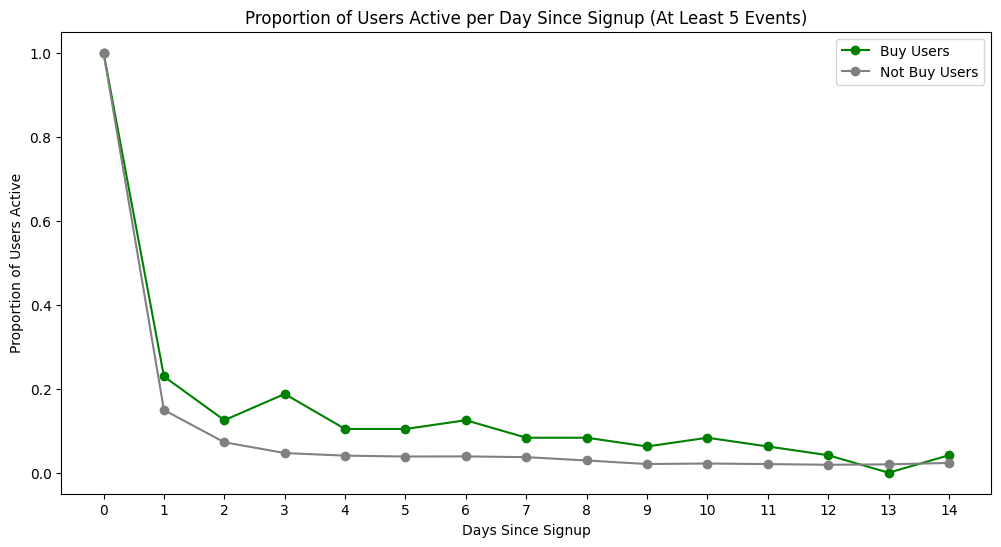

In [23]:
# Calculate the active rate per day for successful and unsuccessful users
active_rate_successful = user_activity_successful[days_active_cols].mean()
active_rate_unsuccessful = user_activity_unsuccessful[days_active_cols].mean()

# Name the x-axis labels
active_rate_successful.index = [f"{i}" for i in range(15)]
active_rate_unsuccessful.index = [f"{i}" for i in range(15)]

# Plot the active rate per day for successful and unsuccessful users
plt.figure(figsize=(12, 6))
plt.plot(active_rate_successful, label="Buy Users", marker="o", color="green")
plt.plot(active_rate_unsuccessful, label="Not Buy Users", marker="o", color="gray")
plt.xlabel("Days Since Signup")
plt.ylabel("Proportion of Users Active")
plt.title("Proportion of Users Active per Day Since Signup (At Least 5 Events)")
plt.legend()
plt.show()

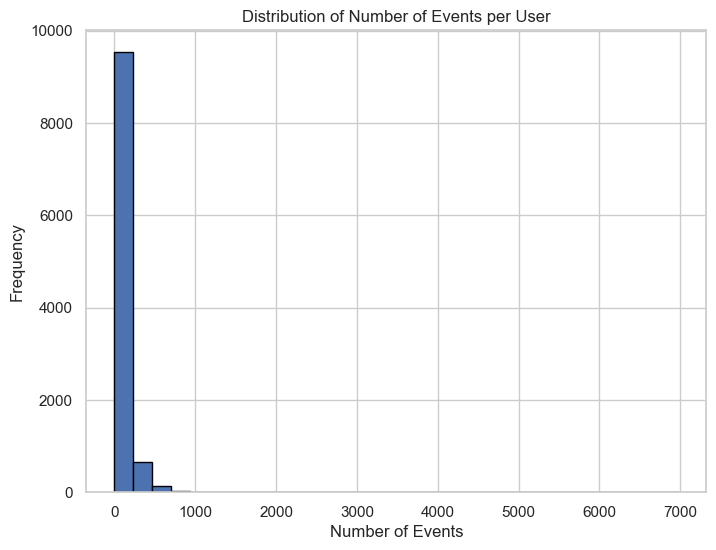

In [108]:
# Create a histogram of the number of events each user has
plt.figure(figsize=(8, 6))
plt.hist(user_data["count"], bins=30, edgecolor="black")
plt.title("Distribution of Number of Events per User")
plt.xlabel("Number of Events")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Country Data

In [24]:
# Group by country to calculate overall conversion rates
country_conversion = (
    user_data.groupby("country")
    .agg(
        total_users=("user_id", "count"),  # Count unique users
        total_success=("successful", "sum"),  # Total successes across users
    )
    .reset_index()
)

# Calculate conversion rate
country_conversion["conversion_rate"] = (
    country_conversion["total_success"] / country_conversion["total_users"]
)
country_conversion = country_conversion.sort_values(by="total_success", ascending=False)

# Display the result
country_conversion

,country,total_users,total_success,conversion_rate
134,United States,844,16,0.018957
111,Saudi Arabia,192,6,0.031250
17,Britain (UK),438,4,0.009132
63,Italy,218,3,0.013761
4,Australia,125,2,0.016000
...,...,...,...,...
43,Fiji,1,0,0.000000
42,Ethiopia,9,0,0.000000
41,Estonia,5,0,0.000000
40,El Salvador,6,0,0.000000


In [25]:
country_conversion[country_conversion["total_success"] >= 1]

,country,total_users,total_success,conversion_rate
134,United States,844,16,0.018957
111,Saudi Arabia,192,6,0.031250
17,Britain (UK),438,4,0.009132
63,Italy,218,3,0.013761
4,Australia,125,2,0.016000
58,Indonesia,881,2,0.002270
119,Spain,123,2,0.016260
49,Germany,153,2,0.013072
61,Ireland,27,2,0.074074
39,Egypt,654,2,0.003058


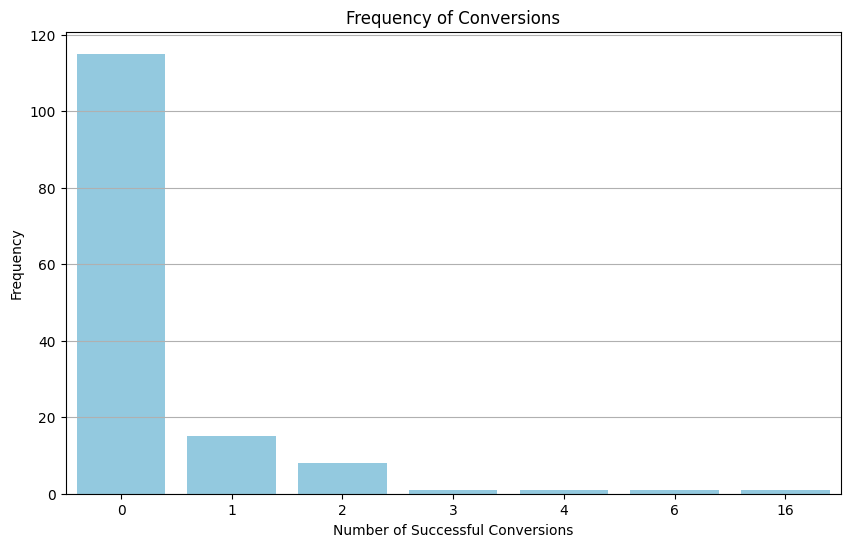

In [26]:
# Create a new DataFrame for conversion frequency
conversion_frequency = (
    country_conversion.groupby("total_success").size().reset_index(name="frequency")
)

# Plotting the frequency of conversions
plt.figure(figsize=(10, 6))
sns.barplot(
    data=conversion_frequency, x="total_success", y="frequency", color="skyblue"
)
plt.title("Frequency of Conversions")
plt.xlabel("Number of Successful Conversions")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

# 7. Summary Statistics

In [27]:
# Get the number of unique users
total_users = user_data["user_id"].nunique()

# Get number of successful users
total_success = user_data["successful"].sum()

# Calculate the conversion rate
conversion_rate = total_success / total_users

# Get the number of unique countries
total_countries = user_data["country"].nunique()

# Get the number of unique timezones
total_timezones = user_data["time_zone"].nunique()

# Display the results in a DataFrame
summary = pd.DataFrame(
    {
        "Total Users": total_users,
        "Total Successful Users": total_success,
        "Conversion Rate": conversion_rate,
        "Total Countries": total_countries,
        "Total Timezones": total_timezones,
    },
    index=["Summary"],
)
summary

,Total Users,Total Successful Users,Conversion Rate,Total Countries,Total Timezones
Summary,10405,103,0.009899,142,216


In [28]:
# Get the unique views
unique_views = data["view"].unique()
unique_views

array(['profile', nan, 'projecthome', 'settings', 'hashtag',
       'upgradeplan', 'benchmark', 'campaigns', 'reports', 'postsfeed',
       'brands', 'bench', 'add', 'addprofiles', 'page', 'proj', 'ads',
       'search', 'connect'], dtype=object)

In [29]:
# Get the unique platforms
unique_platforms = data["platform"].unique()
unique_platforms

array(['ig', 'instagram', 'tw', 'twitter', 'tk', 'tiktok', 'yt',
       'youtube', nan, 'xch', 'meta', 'fb', 'facebook', 'cross-platform',
       'li', 'brbench', 'linkedin', 'hashtags', 'showFacebook', 'all'],
      dtype=object)

In [30]:
# Get the unique report_types
unique_report_types = data["report_type"].unique()
unique_report_types

array([nan, 'ppt_new', 'pptx', 'pdf_new', 'pdf', 'csv', 'xls', 'xlsx',
       'ppt'], dtype=object)

### Top 10 Countries by Percentage of Total Users

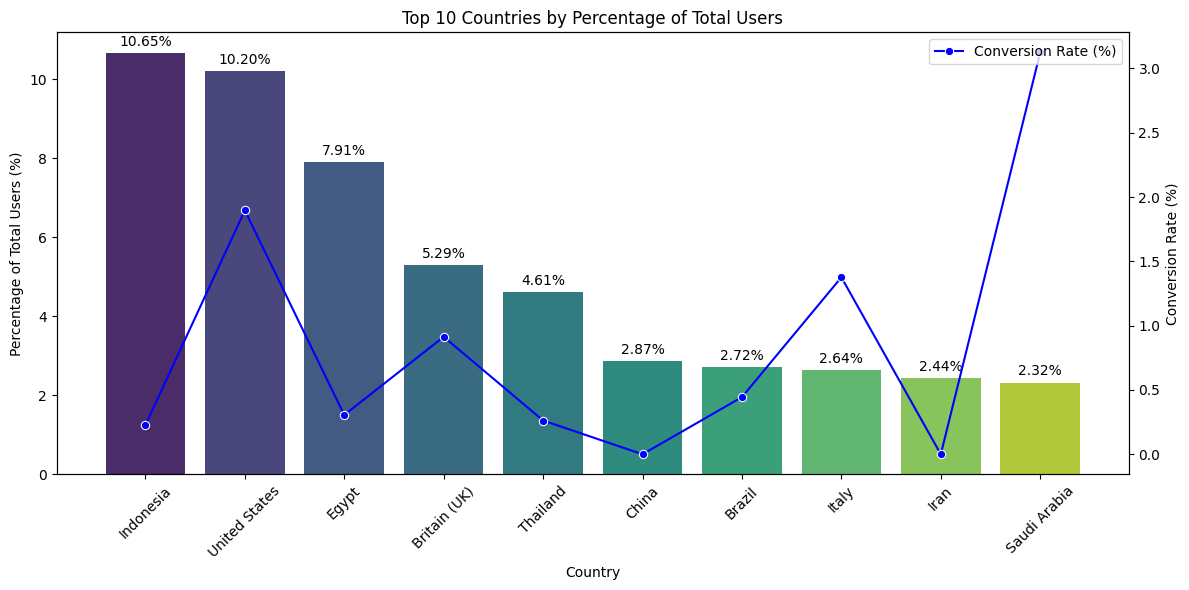

In [31]:
# Calculate the percentage of total users for each country
total_users = user_data["country"].count()
top_countries = (user_data["country"].value_counts().head(10) / total_users) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")

# Add titles and labels
plt.title("Top 10 Countries by Percentage of Total Users")
plt.xlabel("Country")
plt.ylabel("Percentage of Total Users (%)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(False)

# Add data labels on top of each bar
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".2f")
        + "%",  # Format label with 2 decimal places and a percentage symbol
        (p.get_x() + p.get_width() / 2.0, p.get_height()),  # Position the label
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",  # Offset for visibility
    )

# Add a line chart for conversion rates
ax2 = plt.twinx()
sorted_conversion = country_conversion.set_index("country").loc[top_countries.index]
sorted_conversion["conversion_rate_percent"] = (
    sorted_conversion["conversion_rate"] * 100
)  # Convert to percentage
sns.lineplot(
    data=sorted_conversion,
    x=sorted_conversion.index,
    y="conversion_rate_percent",
    marker="o",
    sort=False,
    ax=ax2,
    color="blue",
    label="Conversion Rate (%)",  # Add label for legend
)

ax2.set_ylabel("Conversion Rate (%)")
ax2.grid(False)

# Add legend for the line plot
ax2.legend(loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()

### Top 10 countries by Conversion Rate

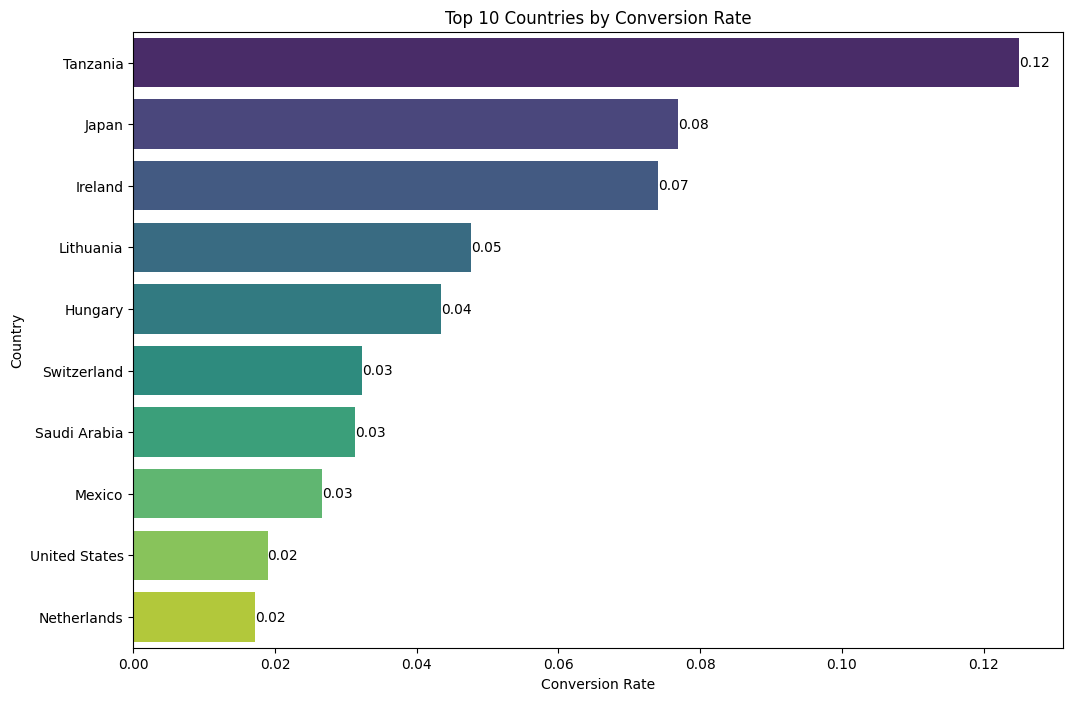

In [32]:
# Filter the top countries by conversion rate
top_countries = country_conversion.sort_values(
    by="conversion_rate", ascending=False
).head(10)

# Add data labels to the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x="conversion_rate", y="country", palette="viridis")
plt.title("Top 10 Countries by Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Country")
for i in range(top_countries.shape[0]):
    plt.text(
        top_countries["conversion_rate"].iloc[i],
        i,
        round(top_countries["conversion_rate"].iloc[i], 2),
        ha="left",
        va="center",
    )
plt.show()

### Buy Users Have More Events on Average

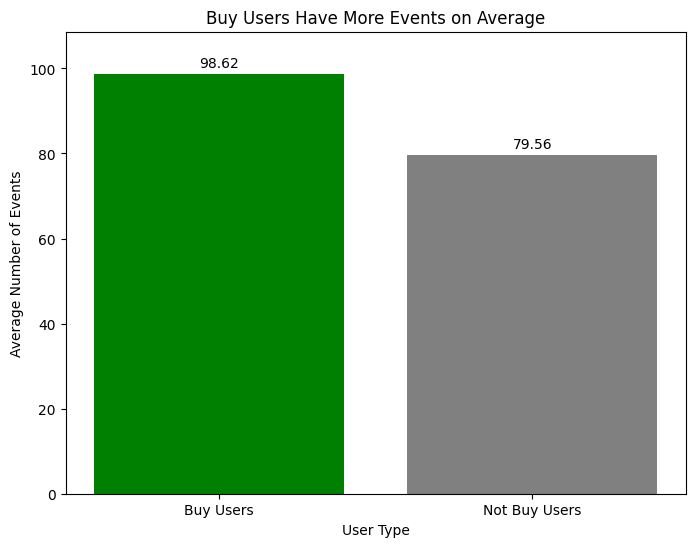

In [33]:
# For buy users events, calculate the average number of events per user
average_events_buy_users = buy_users_events.groupby("user_id").size().mean()


# For not buy users events, calculate the average number of events per user
average_events_not_buy_users = not_buy_users_events.groupby("user_id").size().mean()

# Bar plot for average number of events per user, with data label on top of each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(
    ["Buy Users", "Not Buy Users"],
    [average_events_buy_users, average_events_not_buy_users],
    color=["green", "gray"],
)
plt.title("Buy Users Have More Events on Average")
plt.xlabel("User Type")
plt.ylabel("Average Number of Events")
plt.ylim(0, max(average_events_buy_users, average_events_not_buy_users) + 10)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 1,
        round(yval, 2),
        ha="center",
        va="bottom",
    )

plt.show()

### Buy Users Have Significantly More Events in These Categories

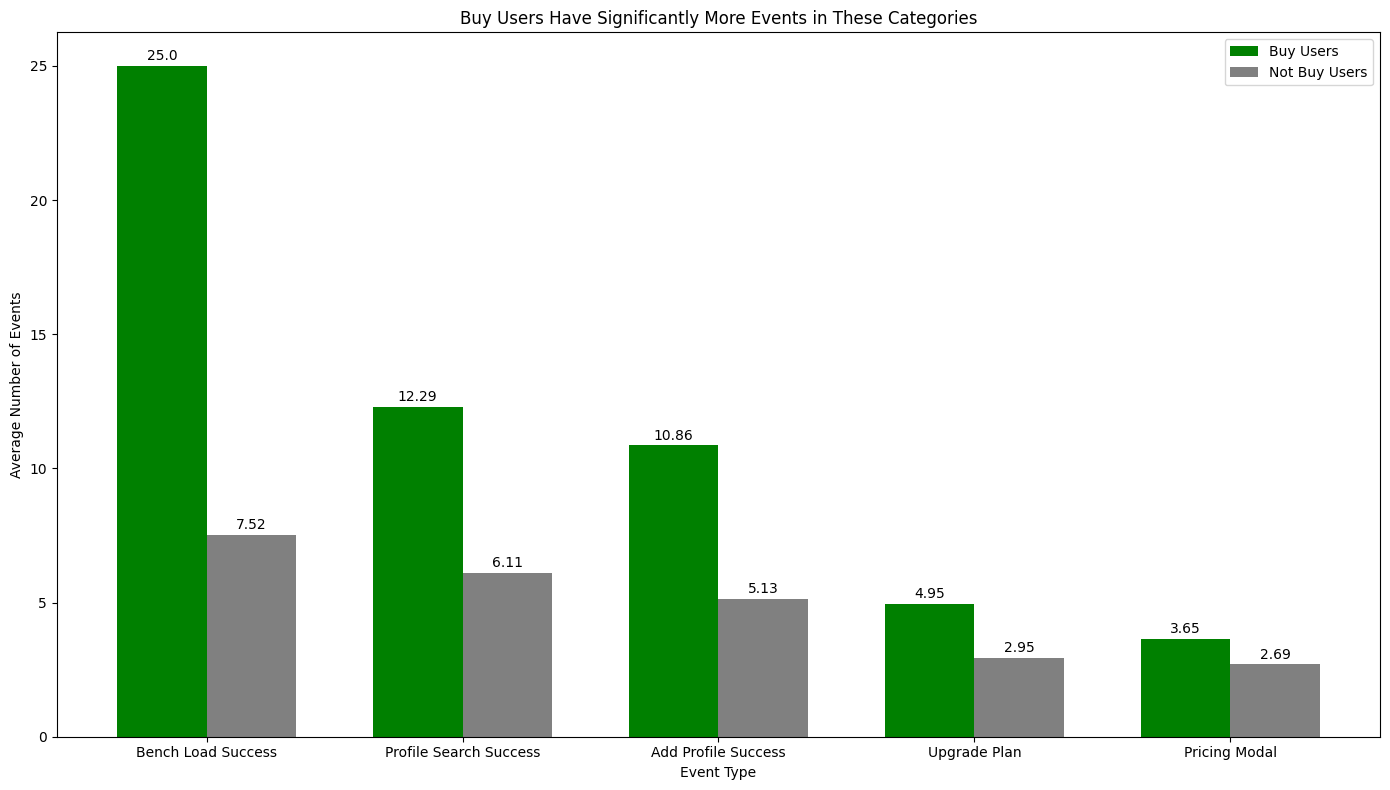

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Data for each metric
average_pricing_modal_views_buy_users = (
    buy_users_events[buy_users_events["event_name"] == "pricing modal visited"]
    .groupby("user_id")
    .size()
    .mean()
)

average_pricing_modal_views_not_buy_users = (
    not_buy_users_events[not_buy_users_events["event_name"] == "pricing modal visited"]
    .groupby("user_id")
    .size()
    .mean()
)

average_upgrade_plan_views_buy_users = (
    buy_users_events[buy_users_events["event_name"] == "upgrade_plan"]
    .groupby("user_id")
    .size()
    .mean()
)

average_upgrade_plan_views_not_buy_users = (
    not_buy_users_events[not_buy_users_events["event_name"] == "upgrade_plan"]
    .groupby("user_id")
    .size()
    .mean()
)

average_bench_load_success_buy_users = (
    buy_users_events[buy_users_events["event_name"] == "bench load success"]
    .groupby("user_id")
    .size()
    .mean()
)

average_bench_load_success_not_buy_users = (
    not_buy_users_events[not_buy_users_events["event_name"] == "bench load success"]
    .groupby("user_id")
    .size()
    .mean()
)

average_profile_search_success_buy_users = (
    buy_users_events[buy_users_events["event_name"] == "profile search success"]
    .groupby("user_id")
    .size()
    .mean()
)

average_profile_search_success_not_buy_users = (
    not_buy_users_events[not_buy_users_events["event_name"] == "profile search success"]
    .groupby("user_id")
    .size()
    .mean()
)

average_add_profile_success_buy_users = (
    buy_users_events[buy_users_events["event_name"] == "add profile success"]
    .groupby("user_id")
    .size()
    .mean()
)

average_add_profile_success_not_buy_users = (
    not_buy_users_events[not_buy_users_events["event_name"] == "add profile success"]
    .groupby("user_id")
    .size()
    .mean()
)

# Combine all the data into lists for sorting
event_types = [
    "Pricing Modal",
    "Upgrade Plan",
    "Bench Load Success",
    "Profile Search Success",
    "Add Profile Success",
]

buy_users_means = [
    average_pricing_modal_views_buy_users,
    average_upgrade_plan_views_buy_users,
    average_bench_load_success_buy_users,
    average_profile_search_success_buy_users,
    average_add_profile_success_buy_users,
]

not_buy_users_means = [
    average_pricing_modal_views_not_buy_users,
    average_upgrade_plan_views_not_buy_users,
    average_bench_load_success_not_buy_users,
    average_profile_search_success_not_buy_users,
    average_add_profile_success_not_buy_users,
]

# Sort the data by buy_users_means in descending order
sorted_indices = np.argsort(buy_users_means)[::-1]
sorted_event_types = [event_types[i] for i in sorted_indices]
sorted_buy_users_means = [buy_users_means[i] for i in sorted_indices]
sorted_not_buy_users_means = [not_buy_users_means[i] for i in sorted_indices]

# Create figure and axis
plt.figure(figsize=(14, 8))

# Number of event types
n_groups = len(event_types)

# Bar width and positions
bar_width = 0.35
index = np.arange(n_groups)

# Plot the bars for buy users
bars1 = plt.bar(
    index, sorted_buy_users_means, bar_width, label="Buy Users", color="green"
)

# Plot the bars for not buy users, offset by the bar width
bars2 = plt.bar(
    index + bar_width,
    sorted_not_buy_users_means,
    bar_width,
    label="Not Buy Users",
    color="gray",
)

# Title and labels
plt.title("Buy Users Have Significantly More Events in These Categories")
plt.xlabel("Event Type")
plt.ylabel("Average Number of Events")

# Set x-ticks with labels for each sorted event type
plt.xticks(index + bar_width / 2, sorted_event_types)

# Add data labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.1,
            round(yval, 2),
            ha="center",
            va="bottom",
        )

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Buy Users Have Less Profile Load Fail and Email Receipt Events

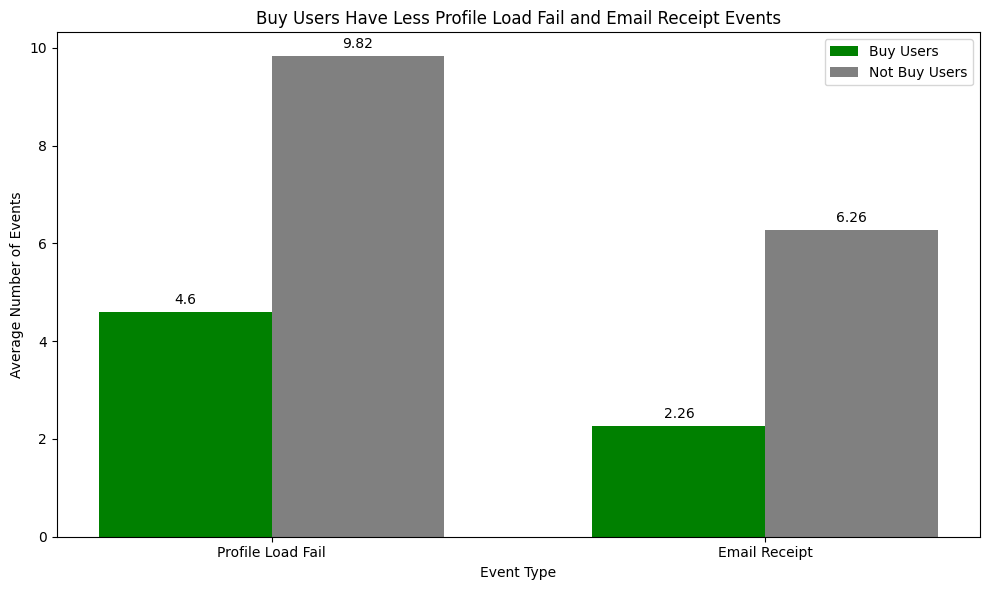

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Values for the two metrics
average_profile_load_fail_buy_users = (
    buy_users_events[buy_users_events["event_name"] == "profile load fail"]
    .groupby("user_id")
    .size()
    .mean()
)

average_profile_load_fail_not_buy_users = (
    not_buy_users_events[not_buy_users_events["event_name"] == "profile load fail"]
    .groupby("user_id")
    .size()
    .mean()
)

average_email_receipt_buy_users = (
    buy_users_events[buy_users_events["event_name"] == "email receipt"]
    .groupby("user_id")
    .size()
    .mean()
)

average_email_receipt_not_buy_users = (
    not_buy_users_events[not_buy_users_events["event_name"] == "email receipt"]
    .groupby("user_id")
    .size()
    .mean()
)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Number of groups (two clusters: one for Profile Load Fail, one for Email Receipt)
n_groups = 2

# Data for each group (Profile Load Fail and Email Receipt)
buy_users_means = [
    average_profile_load_fail_buy_users,
    average_email_receipt_buy_users,
]
not_buy_users_means = [
    average_profile_load_fail_not_buy_users,
    average_email_receipt_not_buy_users,
]

# Bar width and positions
bar_width = 0.35
index = np.arange(n_groups)

# Plot the bars for buy users
bars1 = plt.bar(index, buy_users_means, bar_width, label="Buy Users", color="green")

# Plot the bars for not buy users, offset by the bar width
bars2 = plt.bar(
    index + bar_width,
    not_buy_users_means,
    bar_width,
    label="Not Buy Users",
    color="gray",
)

# Title and labels
plt.title("Buy Users Have Less Profile Load Fail and Email Receipt Events")
plt.xlabel("Event Type")
plt.ylabel("Average Number of Events")

# Set x-ticks with labels for the two event types
plt.xticks(index + bar_width / 2, ["Profile Load Fail", "Email Receipt"])

# Add data labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.1,
            round(yval, 2),
            ha="center",
            va="bottom",
        )

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### User Engagement Calsulated by Each Day's Average Event Number per User

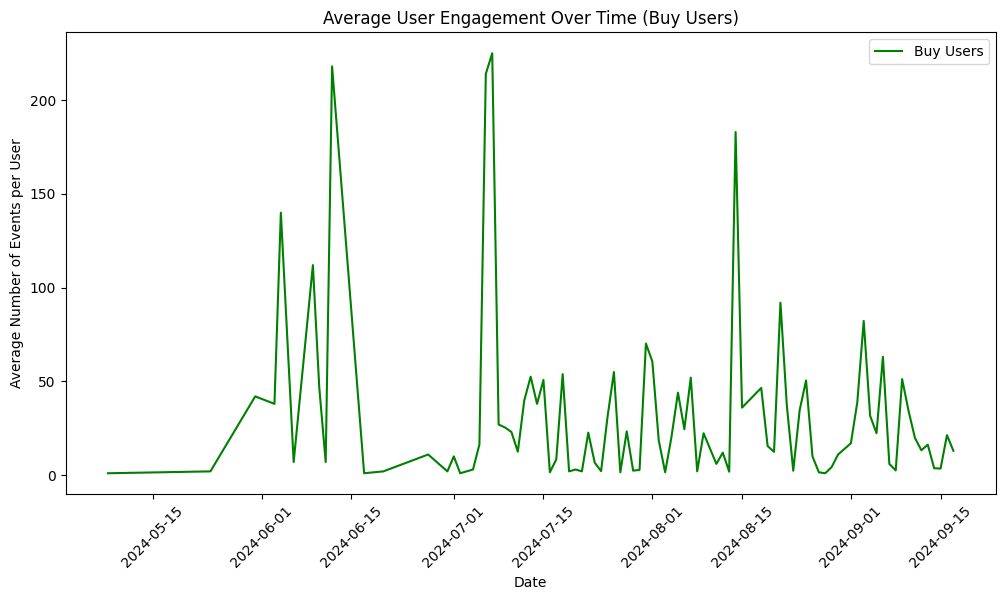

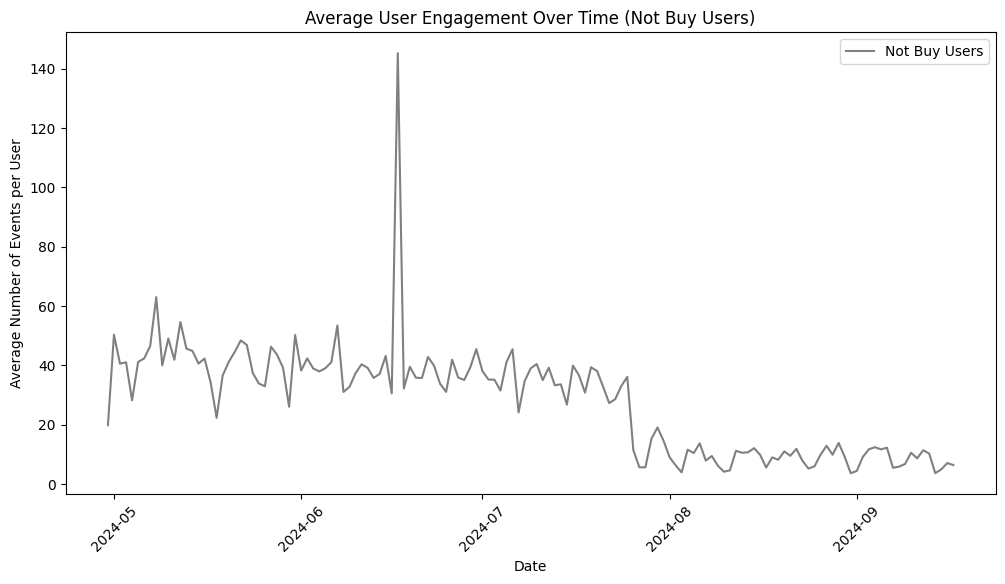

In [37]:
import matplotlib.pyplot as plt

# Group by date and count the number of events per day for both successful and unsuccessful users
successful_data = data[data["successful"] == 1]
unsuccessful_data = data[data["successful"] == 0]

# Calculate the average number of events per user per day for successful users
successful_events_per_day = successful_data.groupby("Date_Created").size()
successful_users_per_day = successful_data.groupby("Date_Created")["user_id"].nunique()
successful_avg_events_per_day = successful_events_per_day / successful_users_per_day

# Calculate the average number of events per user per day for unsuccessful users
unsuccessful_events_per_day = unsuccessful_data.groupby("Date_Created").size()
unsuccessful_users_per_day = unsuccessful_data.groupby("Date_Created")[
    "user_id"
].nunique()
unsuccessful_avg_events_per_day = (
    unsuccessful_events_per_day / unsuccessful_users_per_day
)

# Plotting successful users' average events per day
plt.figure(figsize=(12, 6))
plt.plot(successful_avg_events_per_day, label="Buy Users", color="green")
plt.title("Average User Engagement Over Time (Buy Users)")
plt.xlabel("Date")
plt.ylabel("Average Number of Events per User")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting unsuccessful users' average events per day
plt.figure(figsize=(12, 6))
plt.plot(unsuccessful_avg_events_per_day, label="Not Buy Users", color="gray")
plt.title("Average User Engagement Over Time (Not Buy Users)")
plt.xlabel("Date")
plt.ylabel("Average Number of Events per User")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Hourly User Engagement Distribution per Week in Their Local Time

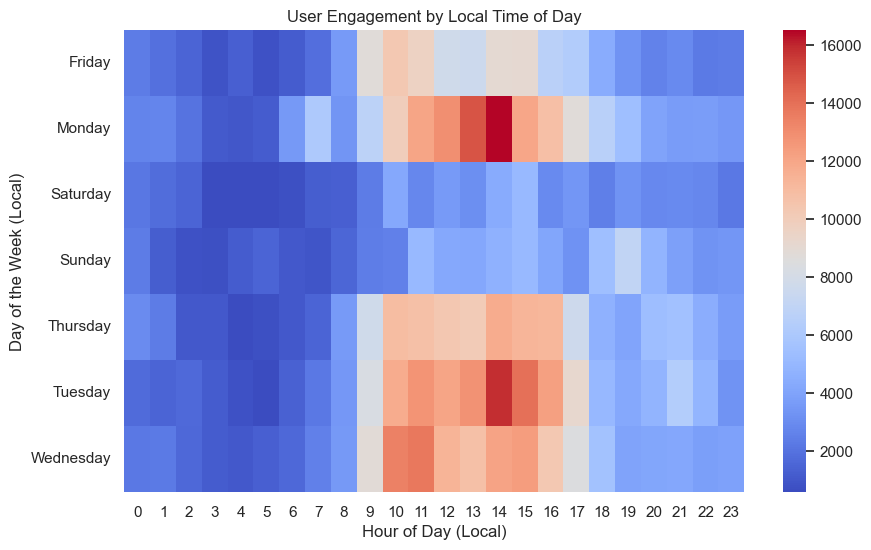

In [122]:
import pandas as pd
import pytz
import numpy as np

# Ensure 'time_created' is in datetime format (UTC)
data["time_created"] = pd.to_datetime(data["time_created"], utc=True)

# Handle missing 'time_zone' values by filling with a default (e.g., 'UTC')
data["time_zone"] = data["time_zone"].fillna("UTC")


# Function to convert 'time_created' from UTC to the user's local time
def convert_to_local_time(row):
    try:
        user_timezone = pytz.timezone(row["time_zone"])
        return row["time_created"].astimezone(user_timezone)
    except Exception as e:
        # If timezone conversion fails, return the original UTC time
        return row["time_created"]


# Apply the conversion function to the DataFrame
data["local_time_created"] = data.apply(convert_to_local_time, axis=1)

# Extract the date, hour, and day of the week directly from the datetime objects
data["Local_Date_Created"] = [dt.date() for dt in data["local_time_created"]]
data["Local_Hour_Created"] = [dt.hour for dt in data["local_time_created"]]
data["Local_Day_Of_Week_Created"] = [
    dt.strftime("%A") for dt in data["local_time_created"]
]

# Now create the heatmap data grouped by the local day of the week and local hour
heatmap_data_local = (
    data.groupby(["Local_Day_Of_Week_Created", "Local_Hour_Created"]).size().unstack()
)

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_local, cmap="coolwarm")
plt.title("User Engagement by Local Time of Day")
plt.xlabel("Hour of Day (Local)")
plt.ylabel("Day of the Week (Local)")
plt.show()

### New Dataframe For Other Analysis

In [123]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the CSV file
data1_new = pd.read_csv("Data/socialinsider_events_2024-05.csv")
data2_new = pd.read_csv("Data/socialinsider_events_2024-06.csv")
data3_new = pd.read_csv("Data/socialinsider_events_2024-07.csv")
data4_new = pd.read_csv("Data/socialinsider_events_2024-08.csv")
data5_new = pd.read_csv("Data/socialinsider_events_2024-09.csv")

# Concatenate the data
data_new = pd.concat([data1_new, data2_new, data3_new, data4_new, data5_new])

# Sort the data by time_created
data_new = data_new.sort_values(by="time_created")

# Create a column that show whether the event is successful or not
buy_users = data_new[
    (data_new["event_name"] == "New Client") | (data_new["event_name"] == "Buy Success")
]["user_id"].tolist()
# 1 if the user is in buy_users, 0 otherwise
data_new["successful"] = data_new["user_id"].apply(lambda x: 1 if x in buy_users else 0)

# create the date that the event was created
data_new["Date_Created"] = pd.to_datetime(data_new["time_created"]).dt.date
# create the hour that the event was created
data_new["Hour_Created"] = pd.to_datetime(data_new["time_created"]).dt.hour
# create the day of the week that the event was created
data_new["Day_Of_Week_Created"] = pd.to_datetime(data_new["time_created"]).dt.day_name()
data_new["time_zone"].unique()

# Create new columns for each unique event in 'event_name' and set 1 if the row's event_name matches the column name and 0 otherwise
event_types = data_new["event_name"].unique()
for event in event_types:
    data_new[event] = (data_new["event_name"] == event).astype(int)

# Group by 'user_id' and sum the event columns to calculate the times each event happened for each user
grouped_data = data_new.groupby("user_id").sum(numeric_only=True).reset_index()

# Create a 'success' column marking users with either 'buy success' or 'New Client' events as successful
grouped_data["success"] = (
    (grouped_data["buy success"] > 0) | (grouped_data["New Client"] > 0)
).astype(int)

# Drop the specified columns: 'load_time', 'Hour_Created' if they exist
columns_to_drop = ["load_time", "successful", "Hour_Created"]
grouped_new_data = grouped_data.drop(columns=columns_to_drop, errors="ignore")

# Select only event columns that are numeric
event_columns = [
    col for col in grouped_new_data.columns if col not in ["user_id", "success"]
]

# Get the number of times the most frequent event occurred
grouped_new_data["times_of_most_frequent_event"] = grouped_new_data[event_columns].max(
    axis=1
)

# Find the column with the maximum event count for each user
grouped_new_data["most_frequent_event"] = grouped_new_data[event_columns].idxmax(axis=1)

# Apply the filter for successful users
successful_users = grouped_new_data[grouped_new_data["success"] == 1][
    ["user_id", "most_frequent_event", "times_of_most_frequent_event"]
]

# Apply the filter for unsuccessful users
unsuccessful_users = grouped_new_data[grouped_new_data["success"] == 0][
    ["user_id", "most_frequent_event", "times_of_most_frequent_event"]
]

### Top 5 Events with Largest Percentage Difference Between Buy and Not Buy Users

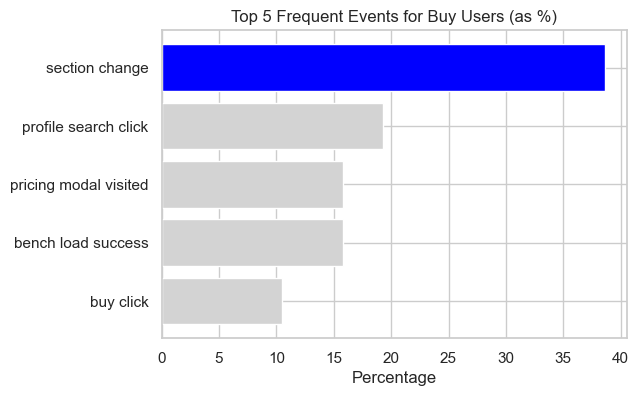

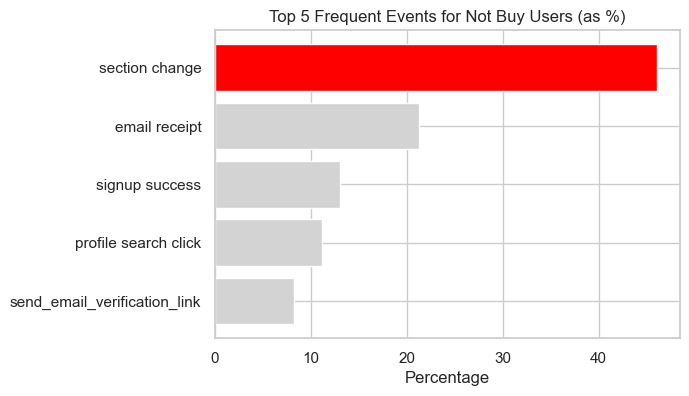

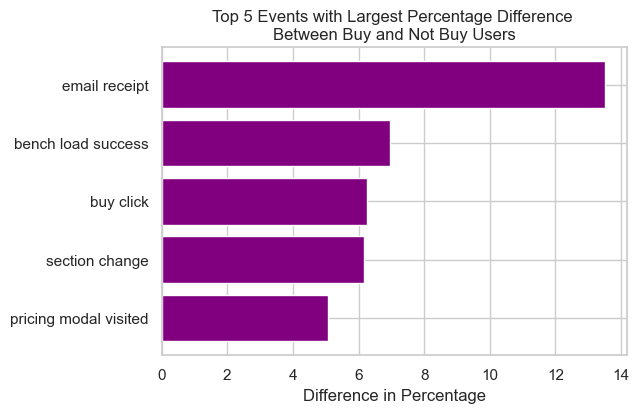

In [124]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming successful_users and unsuccessful_users DataFrames are defined and contain 'most_frequent_event'
# Get event counts for successful users
event_counts_successful = successful_users["most_frequent_event"].value_counts()

# Remove the "New Client" event from the event_counts Series for successful users
event_counts_successful = event_counts_successful[
    event_counts_successful.index != "New Client"
]

# Get event counts for unsuccessful users
event_counts_unsuccessful = unsuccessful_users["most_frequent_event"].value_counts()

# Sorting and calculating percentages
top_5_successful = event_counts_successful.sort_values(ascending=False).head(5)
top_5_unsuccessful = event_counts_unsuccessful.sort_values(ascending=False).head(5)


# Convert counts to percentages for the full list (not just top 5)
successful_percentages = (event_counts_successful / event_counts_successful.sum()) * 100
unsuccessful_percentages = (
    event_counts_unsuccessful / event_counts_unsuccessful.sum()
) * 100


# Convert counts to percentages
top_5_successful_percentage = (top_5_successful / top_5_successful.sum()) * 100
top_5_unsuccessful_percentage = (top_5_unsuccessful / top_5_unsuccessful.sum()) * 100

# Align both percentage series by their indices (event names)
all_events = pd.Index(successful_percentages.index).union(
    unsuccessful_percentages.index
)

# Align percentage series to have the same index
successful_percentages_aligned = successful_percentages.reindex(
    all_events, fill_value=0
)
unsuccessful_percentages_aligned = unsuccessful_percentages.reindex(
    all_events, fill_value=0
)

# Calculate the absolute difference in percentages
percentage_difference = (
    successful_percentages_aligned - unsuccessful_percentages_aligned
).abs()

# Get the top 5 events with the largest absolute difference in percentages
top_5_percentage_difference = percentage_difference.sort_values(ascending=False).head(5)

# Plotting Successful Users Percentages
fig, ax = plt.subplots(figsize=(6, 4))
events = top_5_successful.index
percentages = top_5_successful_percentage.values
colors = ["blue"] + ["lightgray"] * (len(percentages) - 1)

ax.barh(events, percentages, color=colors)
ax.set_xlabel("Percentage")
ax.set_title("Top 5 Frequent Events for Buy Users (as %)")
plt.gca().invert_yaxis()
plt.show()

# Plotting Unsuccessful Users Percentages
fig, ax = plt.subplots(figsize=(6, 4))
events = top_5_unsuccessful.index
percentages = top_5_unsuccessful_percentage.values
colors = ["red"] + ["lightgray"] * (len(percentages) - 1)

ax.barh(events, percentages, color=colors)
ax.set_xlabel("Percentage")
ax.set_title("Top 5 Frequent Events for Not Buy Users (as %)")
plt.gca().invert_yaxis()
plt.show()

# Plotting the Largest Percentage Difference Between Successful and Unsuccessful Users
fig, ax = plt.subplots(figsize=(6, 4))
events = top_5_percentage_difference.index
differences = top_5_percentage_difference.values

ax.barh(events, differences, color="purple")
ax.set_xlabel("Difference in Percentage")
ax.set_title(
    "Top 5 Events with Largest Percentage Difference \nBetween Buy and Not Buy Users"
)
plt.gca().invert_yaxis()
plt.show()

### Maximum Load Time for Buy and Not Buy Users

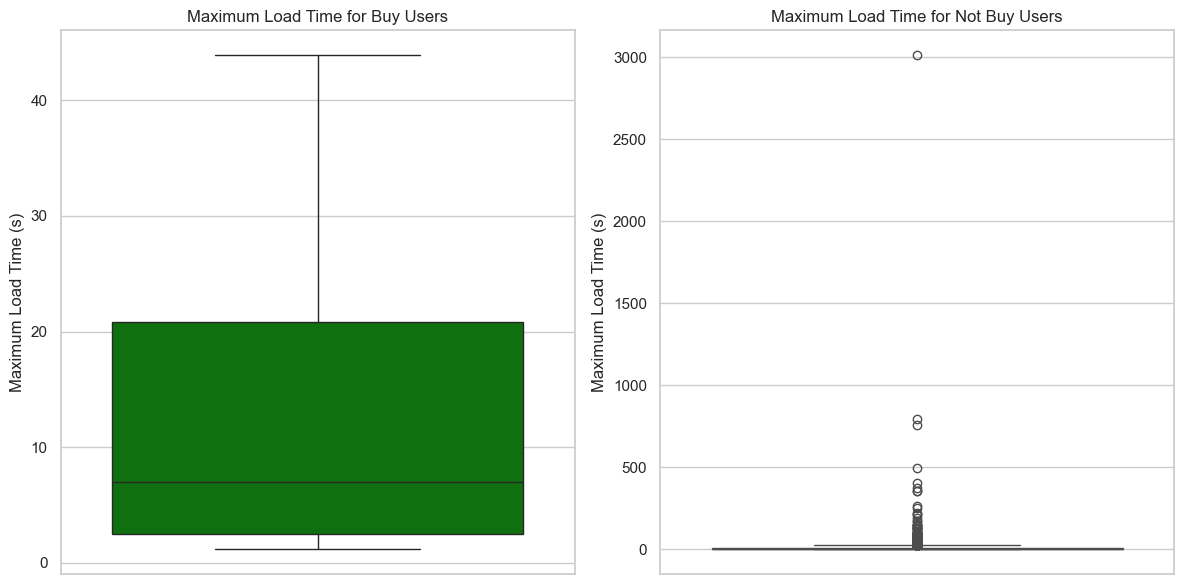

In [125]:
# Group by 'user_id' and calculate the maximum load time and determine success
aggregated_data = data_new.groupby("user_id").agg(
    maximum_load_time=("load_time", "max"),
    successful=("successful", lambda x: 1 if x.max() > 0 else 0),
)

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a boxplot for successful users
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # This means 1 row, 2 columns, 1st subplot
sns.boxplot(
    y=aggregated_data[aggregated_data["successful"] == 1]["maximum_load_time"],
    color="green",
)
plt.title("Maximum Load Time for Buy Users")
plt.ylabel("Maximum Load Time (s)")

# Create a boxplot for unsuccessful users
plt.subplot(1, 2, 2)  # This means 1 row, 2 columns, 2nd subplot
sns.boxplot(
    y=aggregated_data[aggregated_data["successful"] == 0]["maximum_load_time"],
    color="red",
)
plt.title("Maximum Load Time for Not Buy Users")
plt.ylabel("Maximum Load Time (s)")

plt.tight_layout()
plt.show()